# No Balancing: Discord Spam Detector

### Tamara Frances
<br>

---
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [2]:
df = pd.read_excel('../data/data-for-capstone.xlsx')
df.columns = df.columns.str.lower()
df = df.rename(columns={'spam?':'spam'})

<br>

---

<br>

## Baseline
<br>

In [3]:
X = df['text']
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42)

In [4]:
y.value_counts(normalize=True)

N    0.87963
Y    0.12037
Name: spam, dtype: float64

<br>
<br>

---

<br>
<br>

## Models
<br>

In [5]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

<br>

### Logistic Regression

train score: 0.9938271604938271 , test score: 0.9135802469135802
The accuracy score with hyperparameter tuning increased by : 0.0
Classification Report:
              precision    recall  f1-score   support

           N       0.92      0.99      0.95       143
           Y       0.86      0.32      0.46        19

    accuracy                           0.91       162
   macro avg       0.89      0.65      0.71       162
weighted avg       0.91      0.91      0.90       162



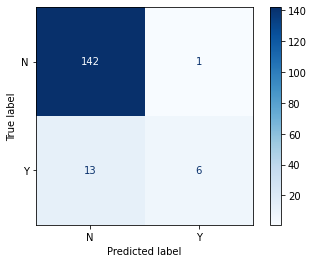

In [6]:
lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train_cv, y_train)
print('train score:',lr.score(X_train_cv, y_train), ', test score:',lr.score(X_test_cv, y_test))

pipeline = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('lr', LogisticRegression(max_iter = 10_000))
])

parameters = {
    'cv__min_df': (1,2),
    'cv__ngram_range': ((1, 1), (1, 2)),
    'lr__C': [0.25, 0.5, 0.75, 1.0]}
    
gs_lr = GridSearchCV(pipeline, param_grid = parameters)
gs_lr.fit(X_train, y_train);

print('The accuracy score with hyperparameter tuning increased by : '
      f'{round((gs_lr.score(X_test, y_test)) - (lr.score(X_test_cv, y_test)),4)}')

cr_lr = classification_report(y_test, gs_lr.predict(X_test))
print("Classification Report:")
print(cr_lr)

ConfusionMatrixDisplay.from_estimator(gs_lr, X_test, y_test, cmap='Blues');

<br>
<br>

---

<br>
<br>

### Random Forest Classifier

train score: 1.0 , test score: 0.9074074074074074
The accuracy score with hyperparameter tuning increased by : 0.0123
Classification Report:
              precision    recall  f1-score   support

           N       0.93      0.98      0.96       143
           Y       0.75      0.47      0.58        19

    accuracy                           0.92       162
   macro avg       0.84      0.73      0.77       162
weighted avg       0.91      0.92      0.91       162



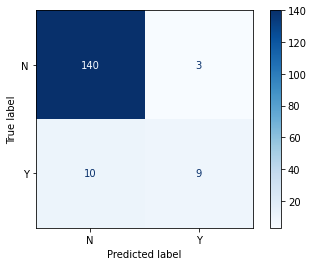

In [7]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_cv, y_train)
print('train score:',rfc.score(X_train_cv, y_train), ', test score:',rfc.score(X_test_cv, y_test))

pipeline = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('rfc', RandomForestClassifier(random_state=42))
])

parameters = {
    'cv__min_df': (1,3),
    'cv__ngram_range': ((1, 1), (1, 2)),
    'rfc__n_estimators': (300, 500),
    'rfc__max_depth': (None, 3, 5),
    'rfc__min_samples_leaf': (1, 3)
}
    
gs_rfc = GridSearchCV(pipeline, param_grid = parameters, n_jobs=-1)
gs_rfc.fit(X_train, y_train);

print('The accuracy score with hyperparameter tuning increased by : '
      f'{round((gs_rfc.score(X_test, y_test)) - (rfc.score(X_test_cv, y_test)),4)}')

cr_rfc = classification_report(y_test, gs_rfc.predict(X_test))
print("Classification Report:")
print(cr_rfc)

ConfusionMatrixDisplay.from_estimator(gs_rfc, X_test, y_test, cmap='Blues');

<br>
<br>

---

<br>
<br>

### Multinomial Naive Bayes

train score: 0.9958847736625515 , test score: 0.9012345679012346
The accuracy score with hyperparameter tuning increased by : 0.0309
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.97      0.96       143
           Y       0.75      0.63      0.69        19

    accuracy                           0.93       162
   macro avg       0.85      0.80      0.82       162
weighted avg       0.93      0.93      0.93       162



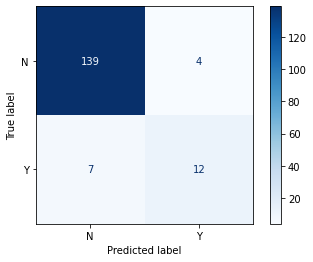

In [8]:
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)
print('train score:',mnb.score(X_train_cv, y_train), ', test score:',mnb.score(X_test_cv, y_test))

pipeline = Pipeline([
    ('cv', CountVectorizer(stop_words='english')),
    ('mnb', MultinomialNB())
])

parameters = {
    'cv__min_df': (1,2,3),
    'cv__ngram_range': ((1, 1), (1, 2), (2,2)),
    'mnb__alpha': [0.01, 0.05, 0.1]
}
    
gs_mnb = GridSearchCV(pipeline, param_grid = parameters, n_jobs=-1)
gs_mnb.fit(X_train, y_train);

print('The accuracy score with hyperparameter tuning increased by : '
      f'{round((gs_mnb.score(X_test, y_test)) - (mnb.score(X_test_cv, y_test)),4)}')

cr_mnb = classification_report(y_test, gs_mnb.predict(X_test))
print("Classification Report:")
print(cr_mnb)

ConfusionMatrixDisplay.from_estimator(gs_mnb, X_test, y_test, cmap='Blues');